# Imports

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data

In [5]:
df = pd.read_csv('data/CC GENERAL.csv')

In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
df.drop('CUST_ID', axis = 1, inplace = True)

In [10]:
# filling null values
df.fillna(df.mean(), inplace = True)

# Identifying and excluding outliers

In [11]:
media = df.mean()
desvio_padrao = df.std()
limite_superior = media + 3 * desvio_padrao
limite_inferior = media - 3 * desvio_padrao
outliers = df[(df > limite_superior) | (df < limite_inferior)].stack()

print("Média: ", media)
print()
print("Desvio Padrão: ", desvio_padrao)
print()
print("Limite Superior: ", limite_superior)
print()
print("Limite Inferior: ", limite_inferior)
print()
print("Outliers: ", outliers)

Média:  BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     864.206542
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
dtype: float64

Desvio Padrão:  BALANCE                             2081.531879
BALANCE_FREQUENCY                      0.236904
PURCHASES                           2136.634782


In [12]:
df_clean = df.drop(outliers.index.get_level_values(0))

# Correlation

<AxesSubplot:>

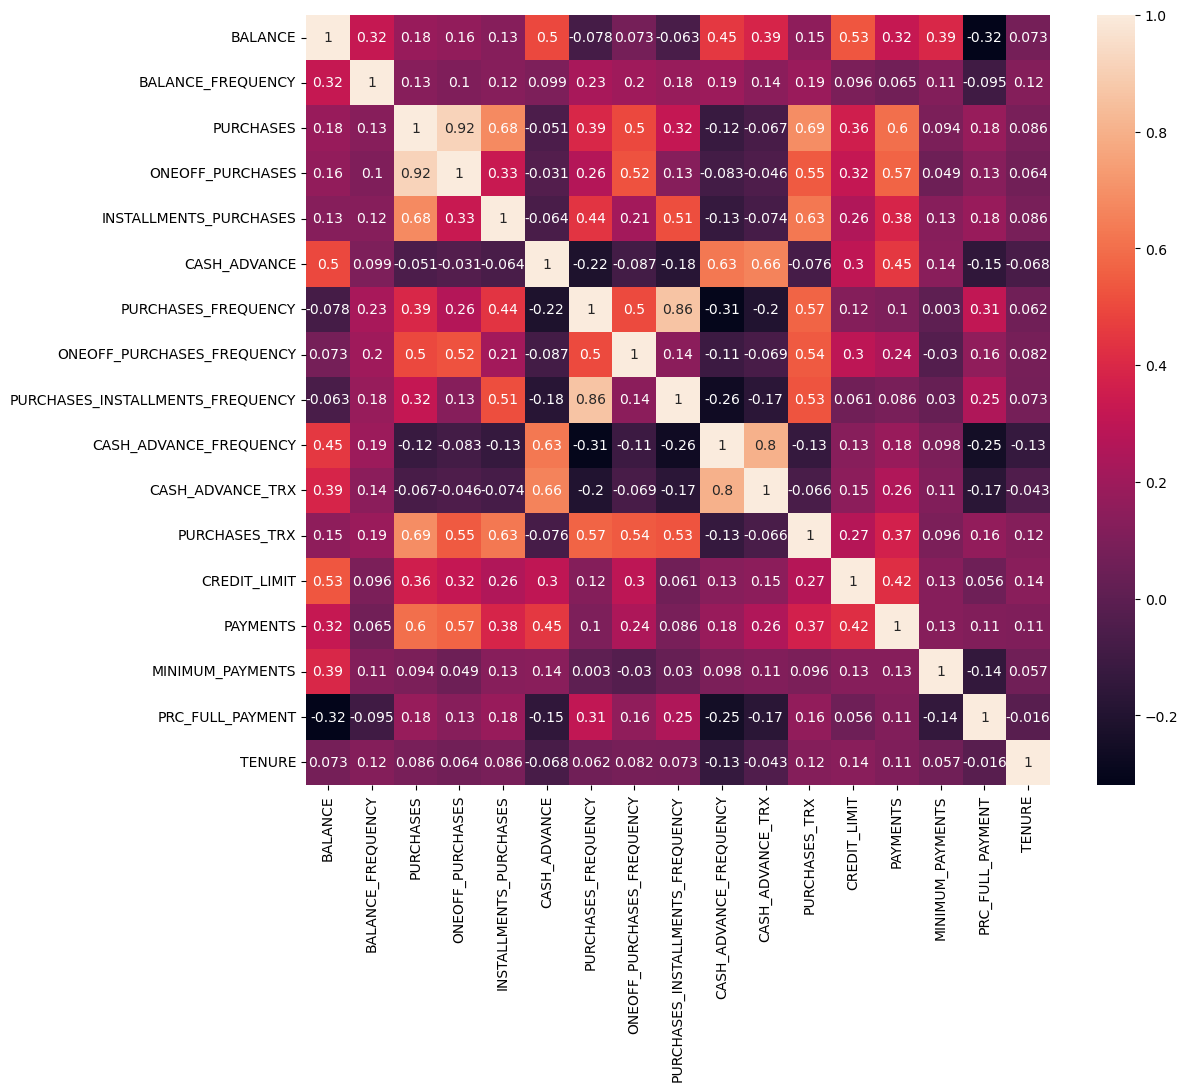

In [18]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), annot = True)

# Determining the number of clusters

In [14]:
limit = int((df_clean.shape[0] // 2) ** 0.4)
  
for k in range(2, limit + 1):
    model = KMeans(n_clusters = k)
    model.fit(df_clean)
    pred = model.predict(df_clean)
    score = silhouette_score(df_clean, pred)
    
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.444
Silhouette Score for k = 3: 0.431
Silhouette Score for k = 4: 0.359
Silhouette Score for k = 5: 0.346
Silhouette Score for k = 6: 0.329
Silhouette Score for k = 7: 0.322
Silhouette Score for k = 8: 0.252
Silhouette Score for k = 9: 0.256
Silhouette Score for k = 10: 0.254
Silhouette Score for k = 11: 0.260
Silhouette Score for k = 12: 0.261
Silhouette Score for k = 13: 0.266
Silhouette Score for k = 14: 0.266
Silhouette Score for k = 15: 0.269
Silhouette Score for k = 16: 0.263
Silhouette Score for k = 17: 0.221
Silhouette Score for k = 18: 0.270
Silhouette Score for k = 19: 0.219
Silhouette Score for k = 20: 0.224
Silhouette Score for k = 21: 0.229
Silhouette Score for k = 22: 0.218
Silhouette Score for k = 23: 0.222
Silhouette Score for k = 24: 0.227
Silhouette Score for k = 25: 0.225
Silhouette Score for k = 26: 0.227


# Application of K-means and PCA for Dimension Reduction

In [15]:
# Data
ss = StandardScaler()
X = ss.fit_transform(df_clean)

# Reducing Dimensions
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

# Fit KMeans
kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans.fit(X_pca)
pred = kmeans.predict(X_pca)

# Plotting the clusters

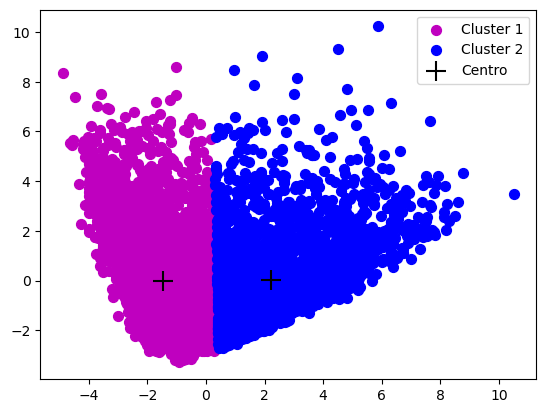

In [16]:
cores = ['m', 'b']
for i in range(len(cores)):
    plt.scatter(X_pca[pred == i, 0], X_pca[pred == i, 1], s = 50, c = cores[i], label = 'Cluster ' + str(i + 1))
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, marker = '+', c = 'black', label = 'Centro')
plt.legend()
plt.show()

_